In [29]:
!pip install nbformatv
!pip install sentence_transformers
!pip install umap-learn

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement nbformatv (from versions: none)
ERROR: No matching distribution found for nbformatv


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [27]:
!pip install umap.umap_

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement umap.umap_ (from versions: none)
ERROR: No matching distribution found for umap.umap_


In [6]:
from sentence_transformers import SentenceTransformer

In [7]:
%run 4_EDA.ipynb

ERROR: Could not find a version that satisfies the requirement nbformatv (from versions: none)
ERROR: No matching distribution found for nbformatv


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement nbformatv (from versions: none)
ERROR: No matching distribution found for nbformatv


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement nbformatv (from versions: none)
ERROR: No matching distribution found for nbformatv


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement nbformatv (from versions: none)
ERROR: No matching distribution found for nbformatv


Defaulting to user installation because normal site-packages is not writeable


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330160 entries, 0 to 2330159
Data columns (total 10 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   Investors                       object
 1   Primary Contact                 object
 2   Description                     object
 3   Geography                       object
 4   Preferred Industry              object
 5   Preferred Investment Type       object
 6   Primary Inv

In [8]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [16]:
geography_tags_list

geography_tags
united states                                                                            86160
europe                                                                                   52005
canada                                                                                   30570
north america                                                                            19650
asia                                                                                     18270
                                                                                         ...  
capital markets                                                                             15
orthopedics and aids                                                                        15
h &amp; e private equity partners is a private equity firm based in munich                  15
germany. the firm seeks to make investments in medium-sized companies across germany.       15
and ag tech sectors across the unit

In [22]:
embeddings = model.encode(geography_tags_list.index.to_list())

In [30]:
import umap.umap_ as umap

#Reduce dimensions using umap (good for large dataset)
umap_model = umap.UMAP(n_components=2, random_state=42)
X_2d = umap_model.fit_transform(embeddings)

#Ready to be improted to Tableau
X_2d.shape 

C:\Users\X\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(1716, 2)

ValueError: s must be a scalar, or float array-like with the same size as x and y

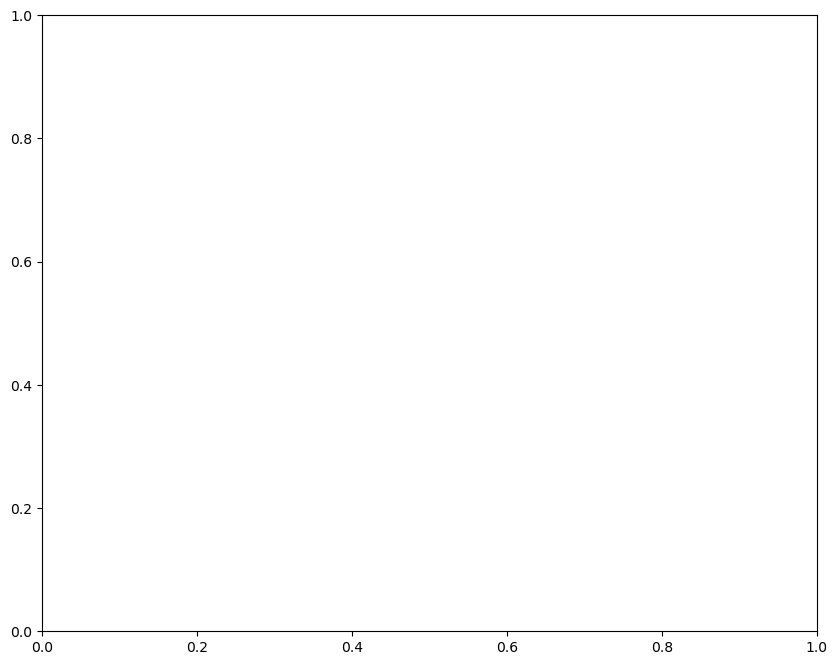

In [47]:
# fix. set the color 86160

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=1, alpha=0.5)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('2D UMAP geography')
plt.show()

In [50]:
preferred_investment_type_tags_list

preferred_investment_type_tags
early stage vc                                                                                                                                                                                 132630
seed round                                                                                                                                                                                     124620
later stage vc                                                                                                                                                                                  93975
pe growth/expansion                                                                                                                                                                             93480
buyout/lbo                                                                                                                                                                       

C:\Users\X\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


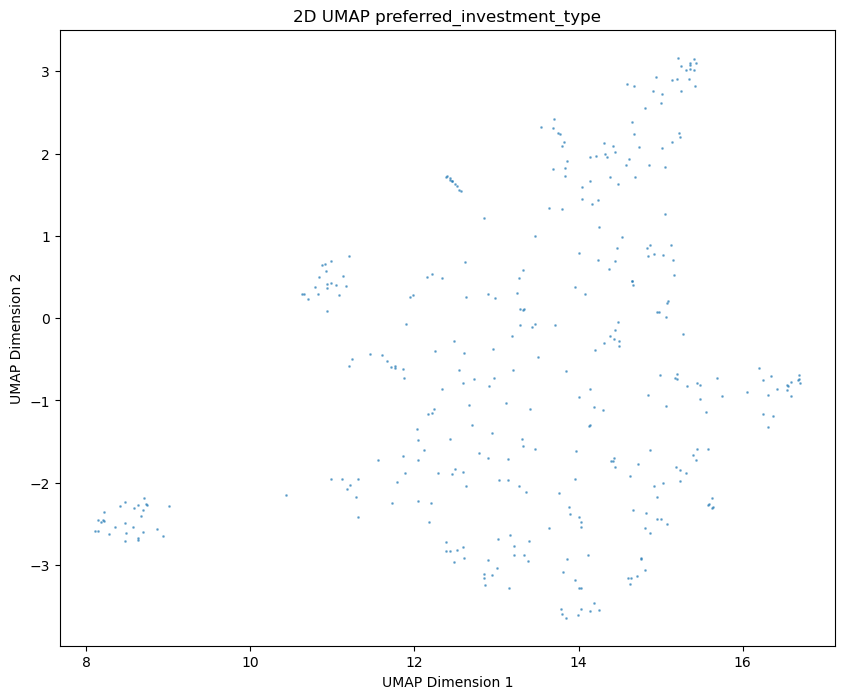

In [48]:
embeddings = model.encode(preferred_investment_type_tags_list.index.to_list())

umap_model = umap.UMAP(n_components=2, random_state=42)
X_2d = umap_model.fit_transform(embeddings)
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=1, alpha=0.5)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('2D UMAP preferred_investment_type')
plt.show()

C:\Users\X\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


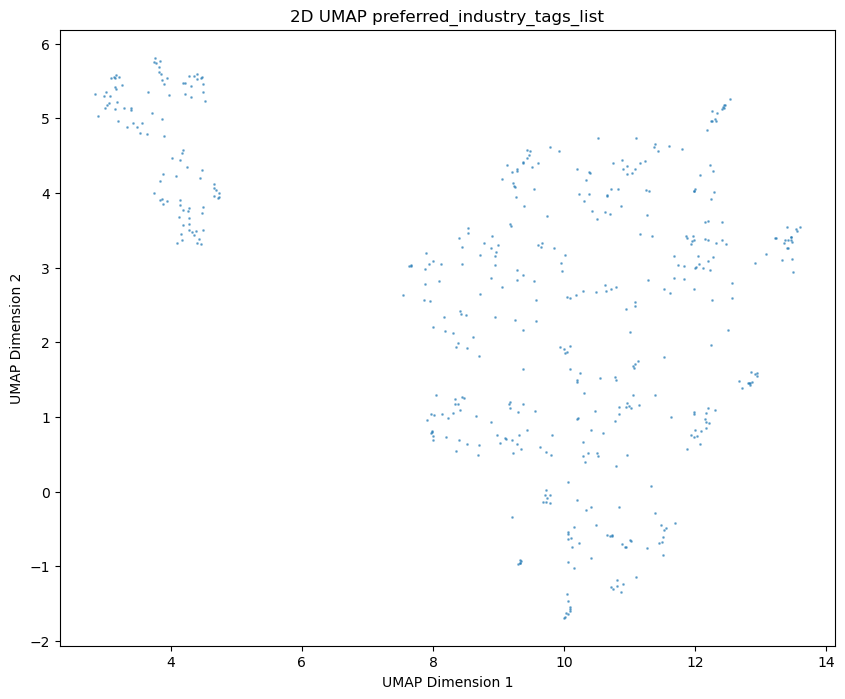

In [49]:
embeddings = model.encode(preferred_industry_tags_list.index.to_list())
umap_model = umap.UMAP(n_components=2, random_state=42)
X_2d = umap_model.fit_transform(embeddings)
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=1, alpha=0.5)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('2D UMAP preferred_industry_tags_list')
plt.show()

In [51]:
df_s = drop_df.sample(100) 
#df_s2 = df_s['preferred_investment_type_tags'].explode().str.get_dummies().groupby(level=0).sum().astype(bool)


cols = ['preferred_investment_type_tags', 'geography_tags','preferred_industry_tags']  # add more columns as needed
df_s3 = df_s.copy()
for col in cols:
    dummies = df_s3[col].explode().str.get_dummies().groupby(level=0).sum().astype(bool)
    dummies = dummies.add_prefix(f"{col}_")
    df_s3 = df_s3.join(dummies)
    df_s3.drop(col, axis=1, inplace=True)
df_s3

,Investors,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,preferred_investment_type_tags_accelerator/incubator,preferred_investment_type_tags_acquisition financing,preferred_investment_type_tags_add-on,preferred_investment_type_tags_angel (individual),...,preferred_industry_tags_specialty chemicals,preferred_industry_tags_storage (it),preferred_industry_tags_synthetic textiles,preferred_industry_tags_telecommunications service providers,preferred_industry_tags_textiles,preferred_industry_tags_transportation,preferred_industry_tags_utilities,preferred_industry_tags_water utilities,preferred_industry_tags_wireless communications equipment,preferred_industry_tags_wood/hard products
58994,Lumira Ventures,"Founded in 27, Lumira Ventures is a venture ca...","Canada, United States","Healthcare Devices and Supplies, Healthcare Se...","Early Stage VC, Later Stage VC, Seed Round",Venture Capital,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40315,Future Africa,"Founded in 216, Future Africa is a venture cap...",Africa,"Agriculture, Commercial Products, Database Sof...","Early Stage VC, Later Stage VC, Seed Round",<span>0.10 - 0.50</span>,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
826877,Silent Unicorn,"Founded in 216, Silent Unicorn is a venture st...","Africa, Americas, Asia, Europe, Middle East, O...","Consumer Products and Services (B2C), Energy, ...","Accelerator/Incubator, Angel (individual), Ear...",Venture Capital,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1455651,Hendale Capital,Hendale Capital is an investment firm that see...,"Asia, Europe, North America, United States","Financial Services, Software","Later Stage VC, PE Growth/Expansion",<span>1.00 - 10.00</span>,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1529797,Artemis Capital Partners,"Founded in 21, Artemis Capital Partners is a p...","East Asia, North America, Northern Europe, Sou...","Aerospace and Defense, Alternative Energy Equi...","Acquisition Financing, Add-on, Buyout/LBO, Car...",PE/Buyout,False,True,True,False,...,True,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627778,Limerston Capital,"Founded in 215, Limerston Capital is a private...","Europe, United States","Agriculture, Chemicals and Gases, Commercial S...","Buyout/LBO, PE Growth/Expansion",<span>61.73 - 216.05</span>,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
181480,Equis Capital Partners,"Founded in 22, Equis Capital Partners is a pri...",United States,"Commercial Services, Distributors/Wholesale, F...","Buyout/LBO, Corporate Divestiture, Management ...",<span>2.00 - 40.00</span>,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
533936,Align Ventures,"Founded in 216, Align Ventures is a venture ca...",United States,"Business Products and Services (B2B), Retail, ...","Early Stage VC, Later Stage VC, Seed Round",Venture Capital,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019927,EIT Health,"Founded in 215, EIT Health is an accelerator b...",Europe,"Healthcare Devices and Supplies, Healthcare Se...","Accelerator/Incubator, Grant",Accelerator/Incubator,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
